# Retail Giant Sales Forecasting Assignment

### Business Understanding :

Global Mart is an online supergiant store that has worldwide operations. It takes orders and delivers across the globe and  caters to 7 different geographical market segments - (Africa, APAC (Asia Pacific), Canada, EU (European Union), EMEA(Middle East), LATAM (Latin America), US (United States)). It deals with all the major product categories — Consumer, Corporate and Home Office.

### Aim :

 To forecast the sales for the most consistently profitable market-segment.

### Flow of Analysis :

**1. Import the required libraries** <br>
**2. Read and understand the data** <br>
**3. Exploratory Data Analysis**<br>
**4. Data Preparation**<br>
**5. Time Series Decomposition**<br>
**6. Build and Evaluate Time Series Forecast**<br>

### Let's get started...

### 1. Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
from scipy.stats import variation

In [2]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [3]:
import sklearn
from sklearn.metrics import mean_squared_error

### 2. Read and understand the data

In [4]:
data = pd.read_csv('D:\PGD DS IIITB\Advanced Machine Learning\Retail Giant Sales Forecasting Assignment\Global+Superstore+Data.csv')
data.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [5]:
# Check the shape of the data
data.shape

(51290, 5)

In [6]:
# Check the overall info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [7]:
# Check the numerical data stats
data.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


### 3. Exploratory Data Analysis

**3.1 Missing values**

In [8]:
data.isnull().sum()

Order Date    0
Segment       0
Market        0
Sales         0
Profit        0
dtype: int64

**Inference: There are no missing values in the data.**

**3.2 Outliers**

In [9]:
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
90%,632.225736,112.680000
95%,1015.955640,211.500000
99%,2301.000000,587.359950


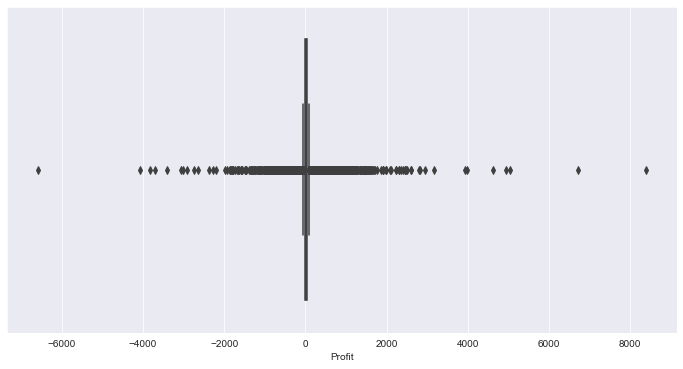

In [10]:
plt.figure(figsize=(12,6))
sns.boxplot(data['Profit'])
plt.show()

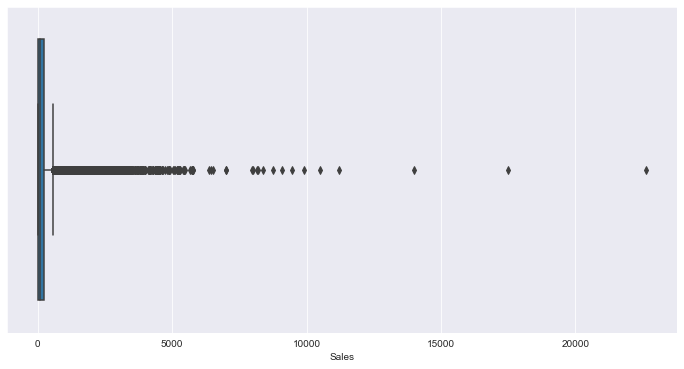

In [11]:
plt.figure(figsize=(12,6))
sns.boxplot(data['Sales'])
plt.show()

**Inference: We can clearly see that there are outliers in the data.**

**We will keep the outliers as they are. We cannot delete them as this is a time series data and deleting any data point will lead to discontinuity in the data.**

**3.3 Univariate Analysis**

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


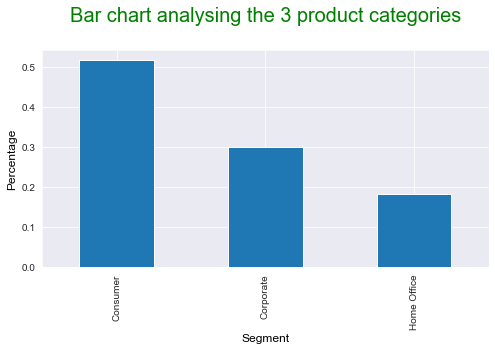

In [13]:
#Segment column
plt.figure(figsize= (8,4))
data["Segment"].value_counts(normalize=True).plot.bar()
plt.title("Bar chart analysing the 3 product categories\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Segment", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

**Inference : Consumer category forms the most in demand product category worldwide for Global Mart.**

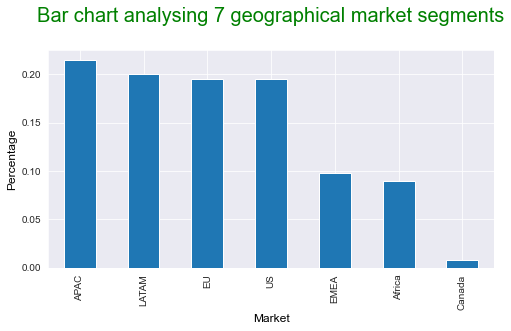

In [14]:
#Market column
plt.figure(figsize= (8,4))
data["Market"].value_counts(normalize=True).plot.bar()
plt.title("Bar chart analysing 7 geographical market segments\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Market", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

**Inference : APAC segment is the most important market segment for Global Mart since most shipments take place in APAC region.**

**3.4 Bivariate Analysis**

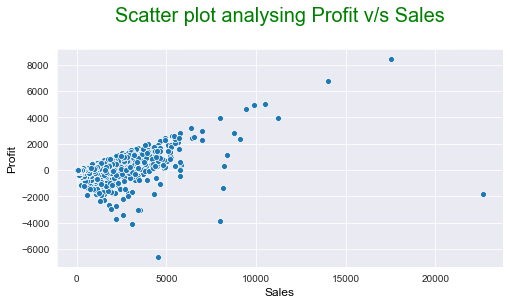

In [15]:
# Profit vs Sales
plt.figure(figsize= [8,4])
sns.scatterplot(data['Sales'], data['Profit'])
plt.title("Scatter plot analysing Profit v/s Sales\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Sales", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Profit", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

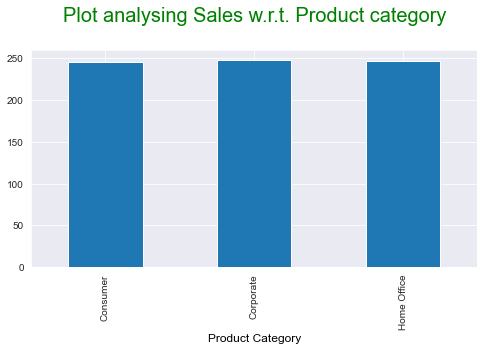

In [16]:
# Sales w.r.t. Product Category
plt.figure(figsize= (8,4))
data.groupby("Segment")["Sales"].mean().plot.bar()
plt.title("Plot analysing Sales w.r.t. Product category\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Product Category", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

**Inference : Though Consumer is the leading category, Corporate category comprises of highest sales amounts.**

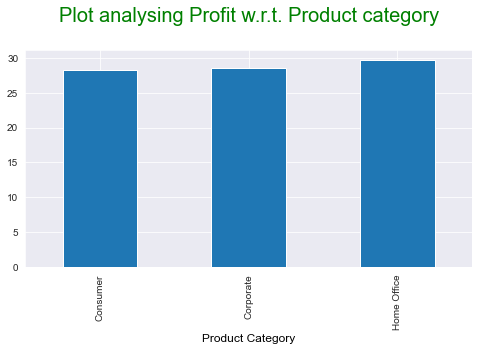

In [17]:
# Profit w.r.t. Product Category
plt.figure(figsize= (8,4))
data.groupby("Segment")["Profit"].mean().plot.bar()
plt.title("Plot analysing Profit w.r.t. Product category\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Product Category", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

**Inference : Home office category makes highest profits.**.

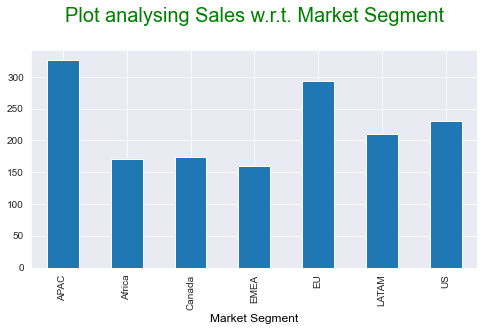

In [18]:
# Sales w.r.t. Market Segment
plt.figure(figsize= (8,4))
data.groupby("Market")["Sales"].mean().plot.bar()
plt.title("Plot analysing Sales w.r.t. Market Segment\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Market Segment", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

**Inference : APAC region has highest Sales.**

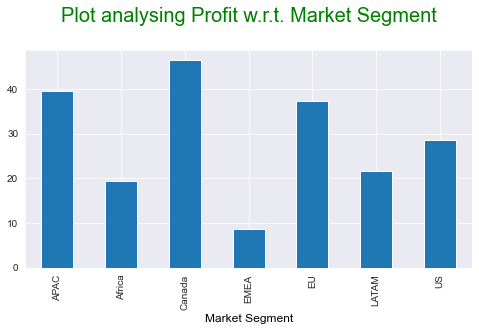

In [19]:
# Profit w.r.t. Market Segment
plt.figure(figsize= (8,4))
data.groupby("Market")["Profit"].mean().plot.bar()
plt.title("Plot analysing Profit w.r.t. Market Segment\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Market Segment", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

**Inference : Canada region makes highest profits.**

**3.5 Multivariate Analysis**

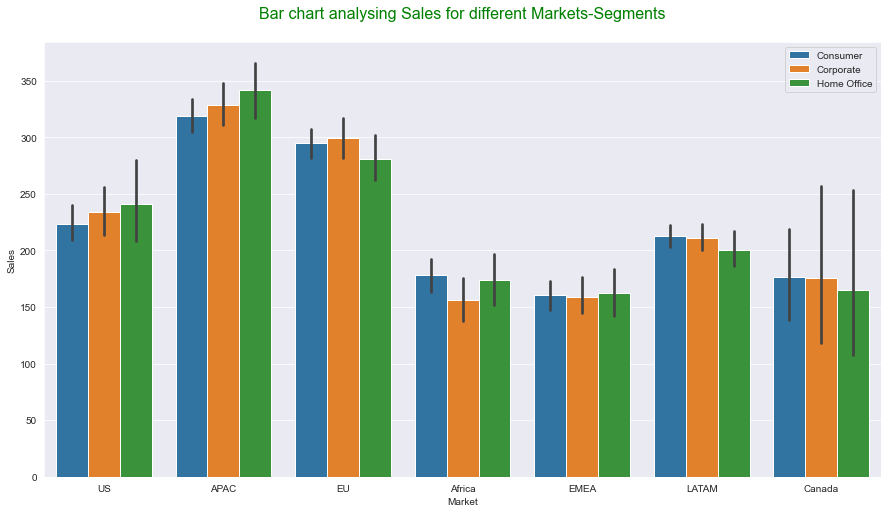

In [20]:
plt.figure(figsize=(15,8))
sns.barplot(data=data, x='Market', y= 'Sales', hue='Segment')
plt.title('Bar chart analysing Sales for different Markets-Segments\n', fontdict={'fontsize': 16, 'fontweight' : 5, 'color' : 'Green'})
plt.legend(loc = 'best')
plt.show()

**Inference: APAC- Home Office is the leading Market-Segment combination in terms of Sales.**

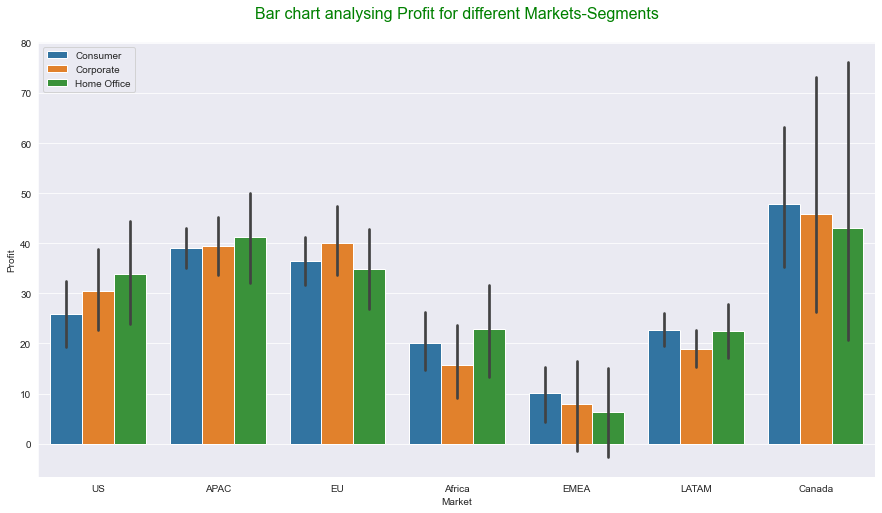

In [21]:
plt.figure(figsize=(15,8))
sns.barplot(data=data, x='Market', y= 'Profit', hue='Segment')
plt.title('Bar chart analysing Profit for different Markets-Segments\n', fontdict={'fontsize': 16, 'fontweight' : 5, 'color' : 'Green'})
plt.legend(loc = 'best')
plt.show()

**Inference: Canada-Consumer is the most profitable market-segment.**

### 4. Data Preparation

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


**Finding 21 Market Segments by combining the respective 7 geographical markets for each of 3 product segments**

In [23]:
# Concatenate the Market and Segment column to get the Market Segment data
data['Market_Segment'] = data['Market']+'-'+data['Segment'] 

In [24]:
data.head() # Check whether the new column is properly created

,Order Date,Segment,Market,Sales,Profit,Market_Segment
0,31-07-2012,Consumer,US,2309.650,762.1845,US-Consumer
1,05-02-2013,Corporate,APAC,3709.395,-288.7650,APAC-Corporate
2,17-10-2013,Consumer,APAC,5175.171,919.9710,APAC-Consumer
3,28-01-2013,Home Office,EU,2892.510,-96.5400,EU-Home Office
4,05-11-2013,Consumer,Africa,2832.960,311.5200,Africa-Consumer


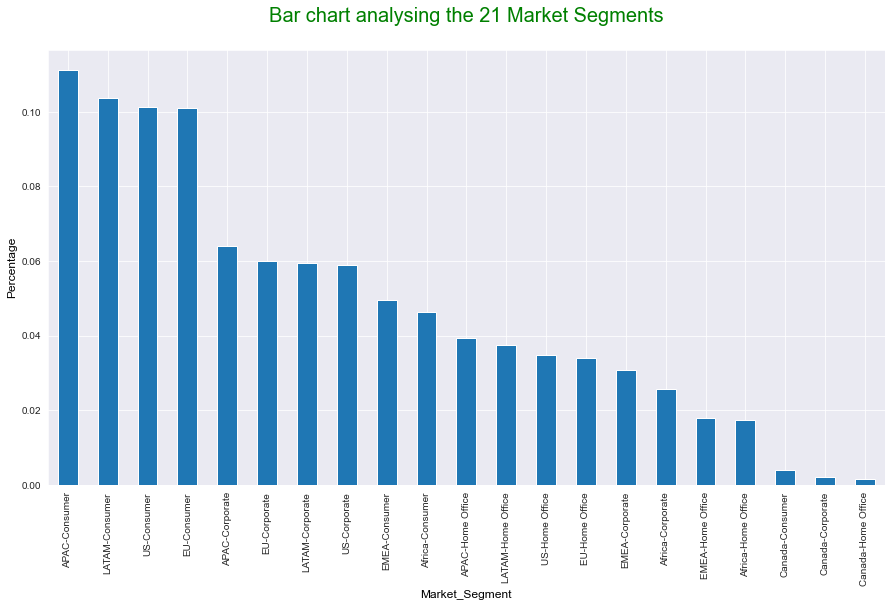

In [25]:
# Market_Segment column
plt.figure(figsize= (15,8))
data["Market_Segment"].value_counts(normalize=True).plot.bar()
plt.title("Bar chart analysing the 21 Market Segments\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Market_Segment", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

In [26]:
data.drop(['Segment', 'Market'], axis = 1, inplace = True)

In [27]:
data.head() # dataset having Order-Date, Sales, Profit against each market segment

,Order Date,Sales,Profit,Market_Segment
0,31-07-2012,2309.650,762.1845,US-Consumer
1,05-02-2013,3709.395,-288.7650,APAC-Corporate
2,17-10-2013,5175.171,919.9710,APAC-Consumer
3,28-01-2013,2892.510,-96.5400,EU-Home Office
4,05-11-2013,2832.960,311.5200,Africa-Consumer


**Coverting the Order Date column to date time format.**

In [28]:
data['Order Date'].head()

0    31-07-2012
1    05-02-2013
2    17-10-2013
3    28-01-2013
4    05-11-2013
Name: Order Date, dtype: object

In [29]:
data['Order Date'] = pd.to_datetime(data['Order Date']).dt.to_period('m') # Converting the Order Date to month-Year format

In [30]:
data.head()

,Order Date,Sales,Profit,Market_Segment
0,2012-07,2309.650,762.1845,US-Consumer
1,2013-05,3709.395,-288.7650,APAC-Corporate
2,2013-10,5175.171,919.9710,APAC-Consumer
3,2013-01,2892.510,-96.5400,EU-Home Office
4,2013-05,2832.960,311.5200,Africa-Consumer


In [31]:
# Displaying the time series data consisting of order, sales, profit for 21 market segments
data.groupby(['Market_Segment', 'Order Date']).sum()

Sales     Profit
Market_Segment Order Date                       
APAC-Consumer  2011-01     18821.9898  2254.4898
               2011-02     23313.3531  4627.8531
               2011-03     26518.4919  2337.8319
               2011-04     12046.0923   633.6423
               2011-05     25941.9000  3838.9500
...                               ...        ...
US-Home Office 2014-08      9036.9855  1168.9436
               2014-09     18312.5080  2788.8755
               2014-10     25045.1610  4104.2505
               2014-11     16151.0440   493.4159
               2014-12     12376.5760  2608.6367

[974 rows x 2 columns]

**We create a Pivot Table to show the data by Order Date as index and each of the 21 market segments as columns with total profit values.**

In [32]:
data_cov = pd.pivot_table(data = data, index = "Order Date", columns = "Market_Segment", values = "Profit", aggfunc="sum")
data_cov

Market_Segment,APAC-Consumer,APAC-Corporate,APAC-Home Office,Africa-Consumer,Africa-Corporate,Africa-Home Office,Canada-Consumer,Canada-Corporate,Canada-Home Office,EMEA-Consumer,...,EMEA-Home Office,EU-Consumer,EU-Corporate,EU-Home Office,LATAM-Consumer,LATAM-Corporate,LATAM-Home Office,US-Consumer,US-Corporate,US-Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.5680,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.2550,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.7450,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.3710,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.3100,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781
2011-06,5231.0316,4550.5506,264.6204,-929.148,-400.917,-727.611,7.50,40.08,23.40,745.518,...,551.208,4135.4460,2214.9660,1580.4495,-115.27088,3248.31820,324.38564,2414.4710,447.1375,208.4844
2011-07,1928.5449,2322.9585,3261.9522,787.158,105.597,-318.942,NaN,509.19,8.40,-333.285,...,-2114.334,602.7330,1394.9100,463.4070,2344.33328,-186.83332,298.97200,-2620.8365,648.1498,1636.2932
2011-08,1101.5235,3137.2923,2187.2787,-387.558,-712.866,1999.050,23.88,NaN,NaN,1344.744,...,-218.802,2264.9640,4390.4490,350.1180,2270.28272,317.83228,660.28524,-548.0292,1910.2192,700.9315
2011-09,3088.9449,2040.2007,1221.6693,274.701,832.434,239.550,181.29,52.14,18.06,61.575,...,582.318,6129.7185,2704.1565,2891.2710,1737.60452,-523.86568,696.95344,9813.4142,-262.5736,676.0368


**Train-Test Split : We divide the data such that train set contains 42 months and test set contains 6 months data**

In [33]:
train_len = 42
train = data_cov[0 : train_len]
test = data_cov[train_len : ]

In [34]:
train.shape

(42, 21)

In [35]:
test.shape

(6, 21)

**Coefficient of variation is a ratio of the standard deviation to mean. We need to find the market segment for which value of Coefficient of variation is the least for profit. This is because, less standard deviation means less variation in profit, which means more consistent are the profit figures for that region over the given period. We calculate the Coefficient of Variation for each of the 21 market segments for 42 months(train data) to decide which market segment is consistently profitable.**

In [36]:
# Calculate mean for the train set
train_mean = np.mean(train)
train_mean

Market_Segment
APAC-Consumer         4400.894243
APAC-Corporate        2574.919807
APAC-Home Office      1511.088314
Africa-Consumer        957.707000
Africa-Corporate       412.617571
Africa-Home Office     377.221071
Canada-Consumer        225.987632
Canada-Corporate        90.980294
Canada-Home Office     118.003750
EMEA-Consumer          423.960286
EMEA-Corporate         182.642643
EMEA-Home Office        84.231366
EU-Consumer           3699.977143
EU-Corporate          2216.299429
EU-Home Office        1224.456536
LATAM-Consumer        2295.555697
LATAM-Corporate       1122.633016
LATAM-Home Office      818.398941
US-Consumer           2686.740912
US-Corporate          1754.199083
US-Home Office        1132.065762
dtype: float64

In [37]:
# Calculate standard deviation for the train set
train_std = np.std(train)
train_std

Market_Segment
APAC-Consumer         2300.457687
APAC-Corporate        1364.837734
APAC-Home Office      1523.508658
Africa-Consumer       1254.932072
Africa-Corporate       780.566850
Africa-Home Office     759.322203
Canada-Consumer        282.555788
Canada-Corporate       162.493114
Canada-Home Office     279.632866
EMEA-Consumer         1124.552711
EMEA-Corporate        1160.698430
EMEA-Home Office       651.283095
EU-Consumer           2202.282289
EU-Corporate          1600.336696
EU-Home Office        1148.627937
LATAM-Consumer        1569.632686
LATAM-Corporate        990.360880
LATAM-Home Office      957.275713
US-Consumer           2715.031412
US-Corporate          1880.200775
US-Home Office        1272.476439
dtype: float64

In [38]:
# Calculate Coefficient of variation for the train set
train_CoV = train_std/train_mean
train_CoV

Market_Segment
APAC-Consumer         0.522725
APAC-Corporate        0.530051
APAC-Home Office      1.008219
Africa-Consumer       1.310351
Africa-Corporate      1.891744
Africa-Home Office    2.012937
Canada-Consumer       1.250315
Canada-Corporate      1.786025
Canada-Home Office    2.369695
EMEA-Consumer         2.652495
EMEA-Corporate        6.355024
EMEA-Home Office      7.732073
EU-Consumer           0.595215
EU-Corporate          0.722076
EU-Home Office        0.938072
LATAM-Consumer        0.683770
LATAM-Corporate       0.882177
LATAM-Home Office     1.169693
US-Consumer           1.010530
US-Corporate          1.071829
US-Home Office        1.124030
dtype: float64

In [39]:
# Creating a dataframe CoV displaying the mean, std. dev. and Coeff. of Var. values against each of the market segments
CoV = pd.DataFrame({'Mean' : train_mean, 'Std_Dev' : train_std, 'Coeff_of_Var' : train_CoV})
CoV

,Mean,Std_Dev,Coeff_of_Var
Market_Segment,,,
APAC-Consumer,4400.894243,2300.457687,0.522725
APAC-Corporate,2574.919807,1364.837734,0.530051
APAC-Home Office,1511.088314,1523.508658,1.008219
Africa-Consumer,957.707000,1254.932072,1.310351
Africa-Corporate,412.617571,780.566850,1.891744
Africa-Home Office,377.221071,759.322203,2.012937
Canada-Consumer,225.987632,282.555788,1.250315
Canada-Corporate,90.980294,162.493114,1.786025
Canada-Home Office,118.003750,279.632866,2.369695


In [40]:
# Find the market segment with least Coefficient of Variation
CoV.sort_values('Coeff_of_Var')

,Mean,Std_Dev,Coeff_of_Var
Market_Segment,,,
APAC-Consumer,4400.894243,2300.457687,0.522725
APAC-Corporate,2574.919807,1364.837734,0.530051
EU-Consumer,3699.977143,2202.282289,0.595215
LATAM-Consumer,2295.555697,1569.632686,0.683770
EU-Corporate,2216.299429,1600.336696,0.722076
LATAM-Corporate,1122.633016,990.360880,0.882177
EU-Home Office,1224.456536,1148.627937,0.938072
APAC-Home Office,1511.088314,1523.508658,1.008219
US-Consumer,2686.740912,2715.031412,1.010530


**Inference : APAC-Consumer is the market segment with least Coefficient of Variation. It means profit figures for APAC-Consumer market segment have been consistent over the train set period. Hence we choose this market segment to further calculate and predict the Sales Values.**

In [41]:
# Filter the main data frame such for APAC-Consumer market segment
data_apac_con = data[data['Market_Segment'] == 'APAC-Consumer']
data_apac_con

,Order Date,Sales,Profit,Market_Segment
2,2013-10,5175.1710,919.9710,APAC-Consumer
6,2011-07,1822.0800,564.8400,APAC-Consumer
7,2012-04,5244.8400,996.4800,APAC-Consumer
14,2013-06,3701.5200,1036.0800,APAC-Consumer
29,2012-02,1878.7200,582.3600,APAC-Consumer
...,...,...,...,...
51215,2013-01,38.9709,-32.3991,APAC-Consumer
51234,2014-12,6.9000,-0.8400,APAC-Consumer
51235,2011-03,17.2800,-13.9200,APAC-Consumer
51236,2013-07,30.6180,1.0080,APAC-Consumer


In [42]:
# Group the data by Order Date for sum of Sales
data1 = data_apac_con.groupby(['Order Date'])['Sales'].sum()
data1

Order Date
2011-01    18821.9898
2011-02    23313.3531
2011-03    26518.4919
2011-04    12046.0923
2011-05    25941.9000
2011-06    30398.9316
2011-07    22431.5949
2011-08    20331.0735
2011-09    24860.3949
2011-10    34787.2881
2011-11    29648.3547
2011-12    30554.8614
2012-01    38369.3127
2012-02    29921.4267
2012-03    21561.5634
2012-04    23356.0467
2012-05    31586.4477
2012-06    39108.9078
2012-07    19210.6728
2012-08    34225.1154
2012-09    21521.7960
2012-10    56741.1831
2012-11    49030.2528
2012-12    40201.6080
2013-01    34777.2885
2013-02    18697.8216
2013-03    26298.6804
2013-04    28451.7387
2013-05    42147.0264
2013-06    60163.8225
2013-07    45990.8958
2013-08    40007.0493
2013-09    47835.0258
2013-10    49095.7305
2013-11    47218.6824
2013-12    63324.6315
2014-01    44475.2703
2014-02    26737.0524
2014-03    57235.1793
2014-04    39308.9121
2014-05    49247.6415
2014-06    55151.4699
2014-07    43672.0749
2014-08    48848.3409
2014-09    45424.3119

### 5. Time series Decomposition

In [43]:
data1 = pd.DataFrame(data1) # Convert to data frame

In [44]:
data1.index = data1.index.to_timestamp() # Converting the index to timestamp

In [45]:
data1.index.dtype

dtype('<M8[ns]')

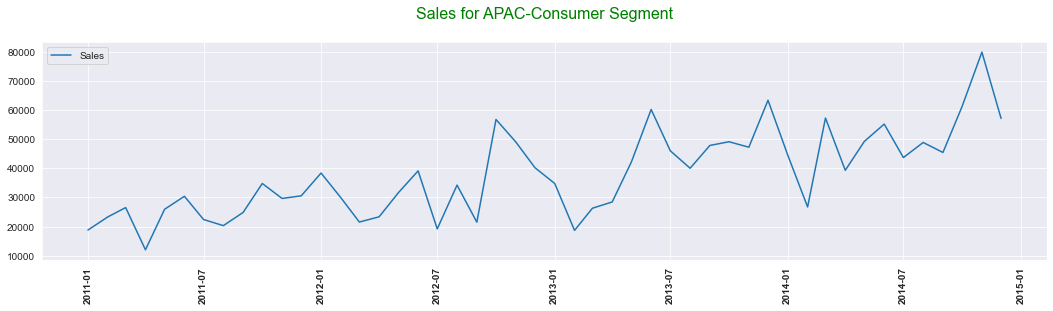

In [46]:
plt.figure(figsize=(18,4))
plt.plot(data1, label='Sales')
plt.legend(loc='best')
plt.title('Sales for APAC-Consumer Segment\n', fontdict={'fontsize': 16, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation = 90,fontweight="bold")
plt.show()

**Additive seasonal decomposition**

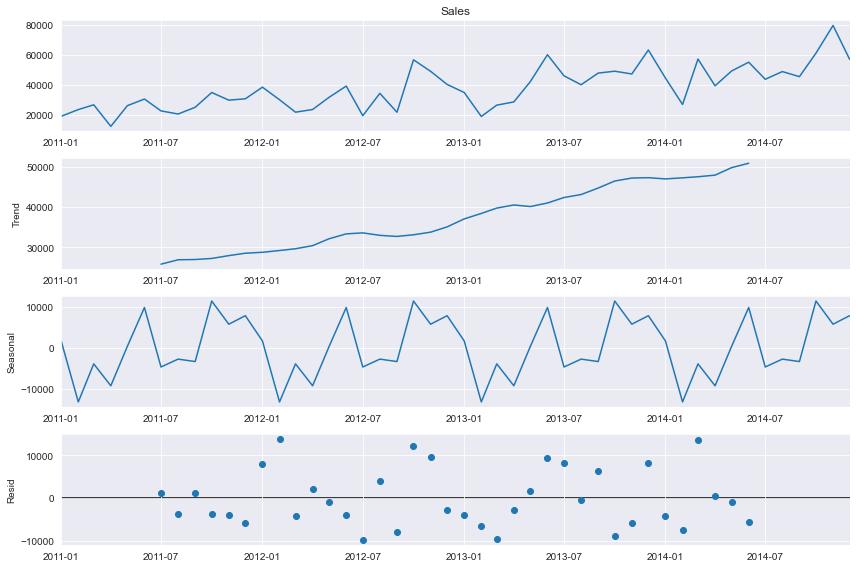

In [47]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data1.Sales, model='additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

**Multiplicative seasonal decomposition**

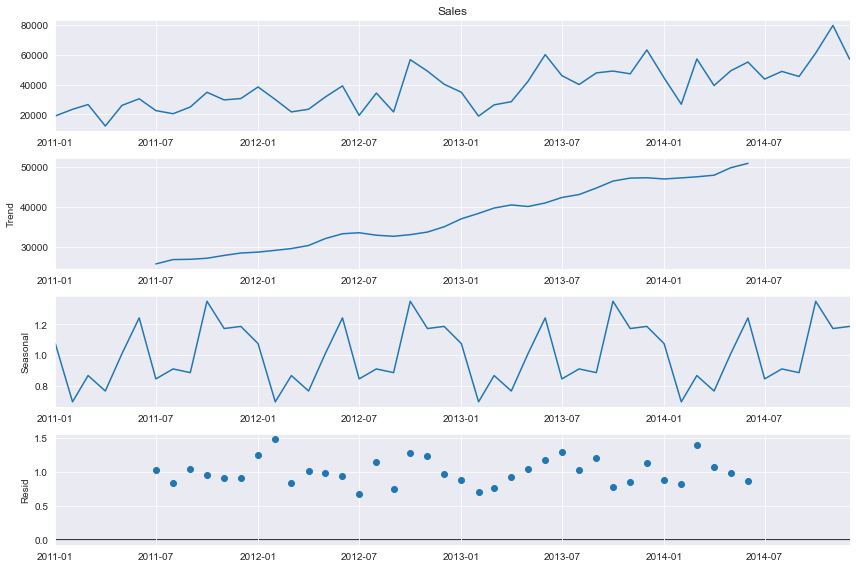

In [48]:
decomposition = sm.tsa.seasonal_decompose(data1.Sales, model='multiplicative') # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

**Inference : The data contains level, trend and seasonality.**

### 6. Build and Evaluate Time Series Forecast

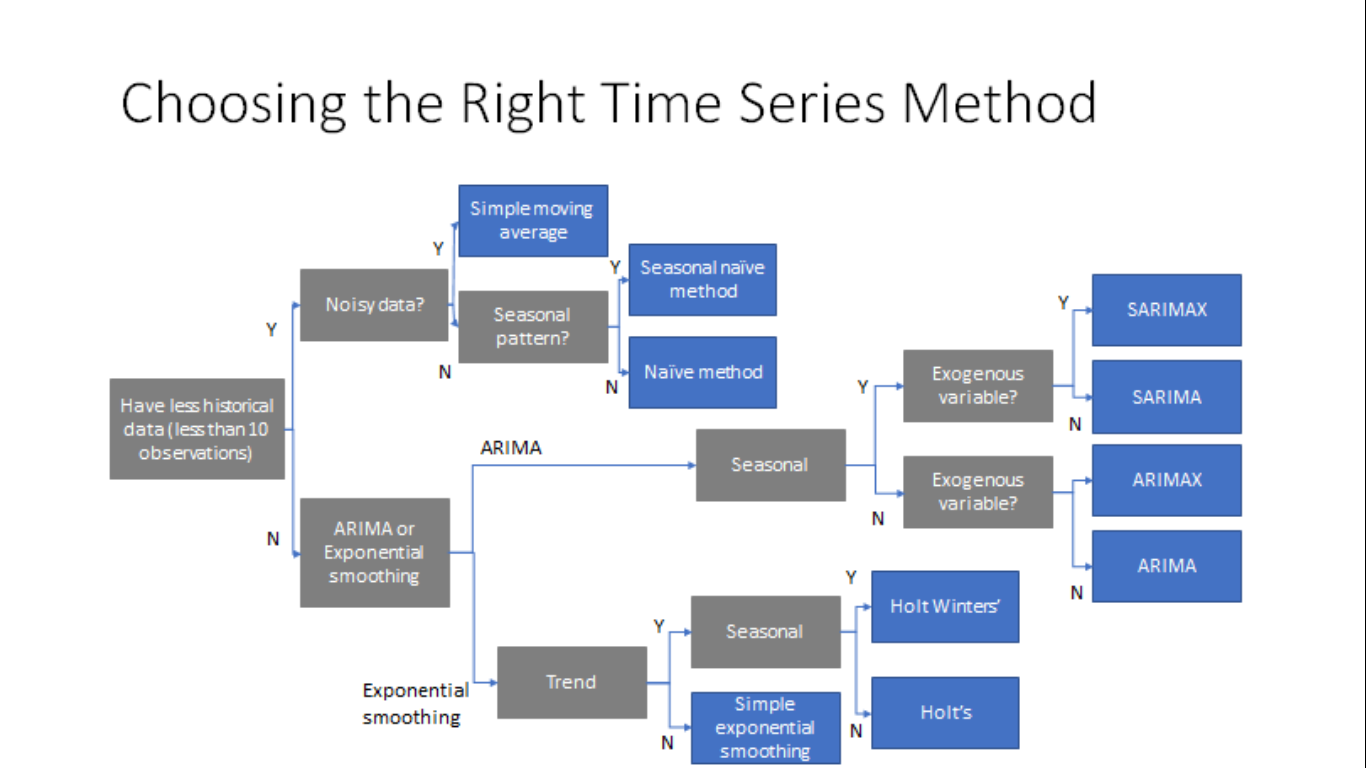

**The number of observations in the train set are more than 10 (42 observations in train set) and our data has both Trend and Seasonality. As per the above flowchart, Holt Winters' Exponential Smoothing (among the smoothing techniques) and SARIMA model (among the ARIMA set of techniques) will be the best for forecasting the Sales for test data.**<br><br>
**Let us verify the same.**

**Split the data into train and test sets.**

In [49]:
train_len = 42
train = data1[0 : train_len]
test = data1[train_len : ]

In [50]:
train.head()

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


In [51]:
test

,Sales
Order Date,
2014-07-01,43672.0749
2014-08-01,48848.3409
2014-09-01,45424.3119
2014-10-01,61221.9792
2014-11-01,79834.4295
2014-12-01,57099.9858


### We build various Time Series Forecast models and compare the RMSE (Root Mean Squared Error) and MAPE (Mean Absolute Percentage Error) values for all the models. Lower values of RMSE and MAPE are desired to conclude that a model performs better.  Accuracy is calculated as (100 - MAPE). Lower the MAPE value, higher is the accuracy.

## Simple time series methods

### Naive method

In [52]:
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Sales'][train_len-1]

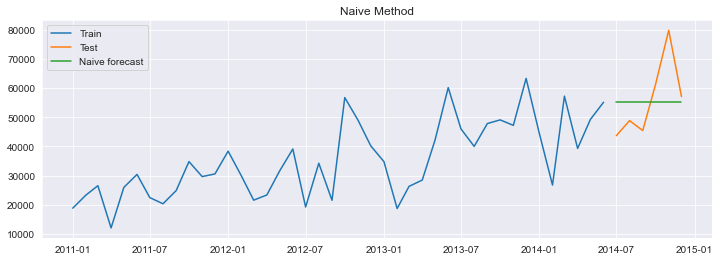

In [53]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [54]:
# Calculate RMSE and MAPE

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_naive['naive_forecast'])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47


### Simple average method

In [55]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Sales'].mean()

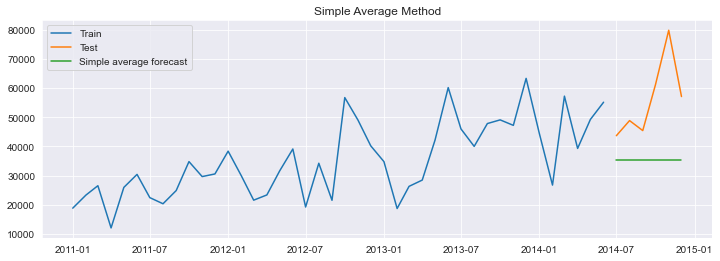

In [56]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

In [57]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_avg['avg_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34


### Simple moving average method

In [58]:
y_hat_sma = data1.copy()
ma_window = 12
y_hat_sma['sma_forecast'] = data1['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

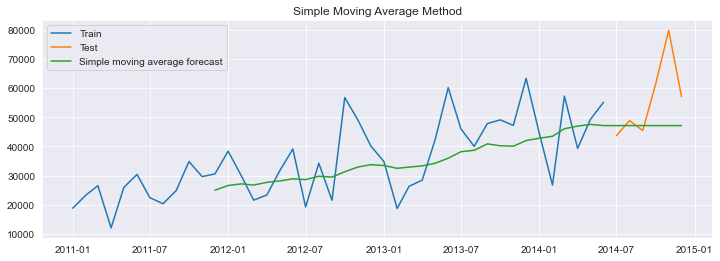

In [59]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()

In [60]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sma['sma_forecast'][train_len:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,15192.01,16.10


## Exponential Smoothing Techniques

### Simple exponential smoothing

In [61]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(test))

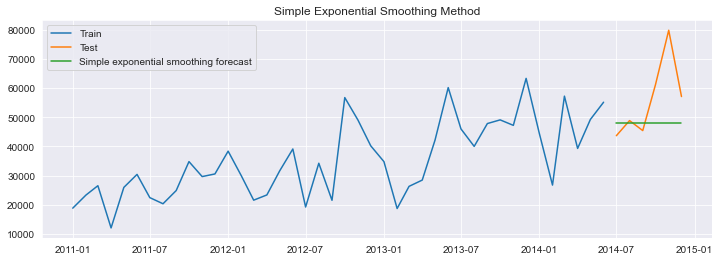

In [62]:
# Plot train, test, forecast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [63]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,15192.01,16.10
0,Simple exponential smoothing forecast,14764.31,15.83


### Holt's method with trend

In [64]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 4.9871463551099955e-06, 'smoothing_slope': 4.983730054348859e-06, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 19518.11808456267, 'initial_slope': 732.447409703522, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


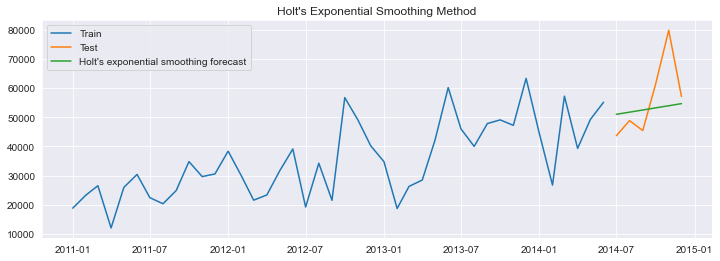

In [65]:
# Plot train, test, forecast

plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [66]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,15192.01,16.10
0,Simple exponential smoothing forecast,14764.31,15.83
0,Holt's exponential smoothing method,11919.62,14.67


**Inference : Holt's exponential smoothing method performs better than Simple exponential smoothing.**

### Holt Winters' additive method with trend and seasonality

In [67]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.0010509388141032566, 'smoothing_slope': 0.0010509370471667254, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 29624.549305629498, 'initial_slope': 726.1284148593357, 'initial_seasons': array([-10914.24574131, -18060.72464413, -11449.93813176, -20493.07274934,
        -9073.31688794,  -1568.37326276, -13896.80392851, -13464.39086896,
       -12517.80722356,    690.05605158,  -4713.05363924,  -3071.06327142]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


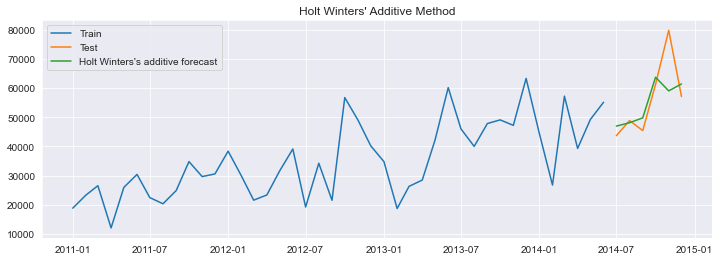

In [68]:
# Plot train, test, forecast

plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

In [69]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,15192.01,16.10
0,Simple exponential smoothing forecast,14764.31,15.83
0,Holt's exponential smoothing method,11919.62,14.67
0,Holt Winters' additive method,9012.78,9.39


**Inference : Holt Winters' additive method performs better than Holt's method with trend.**

### Holt Winter's multiplicative method with trend and seasonality

In [70]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 9.582290725204863e-05, 'smoothing_slope': 9.582087430729273e-05, 'smoothing_seasonal': 0.0002891739565279278, 'damping_slope': nan, 'initial_level': 34110.96530959016, 'initial_slope': 730.416973137932, 'initial_seasons': array([0.71599532, 0.48679565, 0.68350968, 0.53337241, 0.73927219,
       0.90249673, 0.62362308, 0.656219  , 0.6490747 , 0.93258796,
       0.82846243, 0.88581098]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


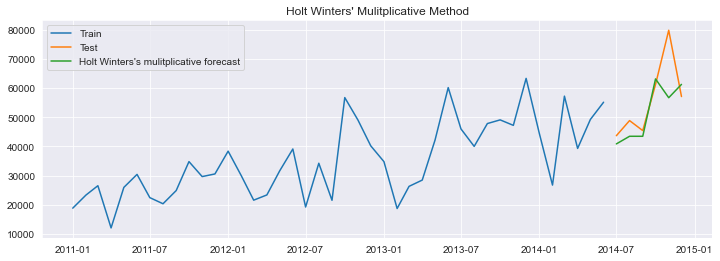

In [71]:
# Plot train, test, forecast

plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

In [72]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,15192.01,16.10
0,Simple exponential smoothing forecast,14764.31,15.83
0,Holt's exponential smoothing method,11919.62,14.67
0,Holt Winters' additive method,9012.78,9.39
0,Holt Winters' multiplicative method,9975.05,10.20


**Inference : Holt Winters' additive method performs better than Holt Winters' multiplicative method.**

### We conclude that the Holt Winters' additive method in the smoothing techniques is able to forecast the sales closer to the actual values.The RMSE and MAPE values for this method are lower as compared to other model methods. This method is very well able to capture the trend and seasonality in the data. 

## Auto Regressive methods

### Check whether the time series is stationary

### Augmented Dickey-Fuller (ADF) test

In [73]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data1['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' %adf_test[1])

ADF Statistic: -3.376024
Critical Values @ 0.05: -2.93
p-value: 0.011804


**Inference : p-value is less than 0.05. This means that the series is stationary.**

### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [74]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data1['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.577076
Critical Values @ 0.05: 0.46
p-value: 0.024720


**Inference : p-value is less than 0.05. This means that the series is not stationary.**

### To make the series stationary, we need to perform transformation and differencing.

### Box Cox transformation to make variance constant

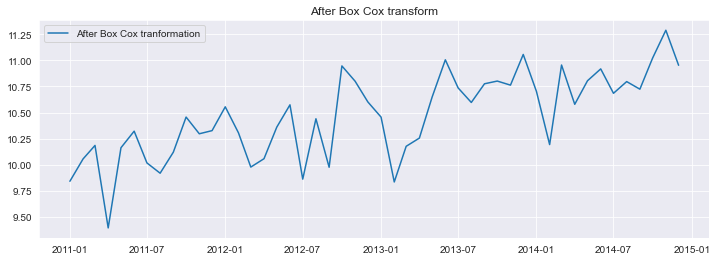

In [75]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data1['Sales'], lmbda=0), index = data1.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

### Differencing to remove trend

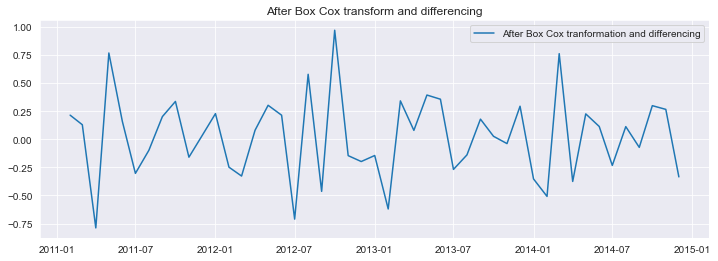

In [76]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data1.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [77]:
data_boxcox_diff.dropna(inplace=True) # After shifting the data, drop the first value which is NA

In [78]:
data_boxcox_diff.tail()

Order Date
2014-08-01    0.112012
2014-09-01   -0.072673
2014-10-01    0.298459
2014-11-01    0.265449
2014-12-01   -0.335151
Freq: MS, dtype: float64

**Now let us see whether our series has become stationary.**

### Augmented Dickey-Fuller (ADF) test

In [79]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -4.535011
Critical Values @ 0.05: -2.95
p-value: 0.000170


**Inference : p-value is less than 0.05. This means that the series is stationary.**

### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

In [80]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.156456
Critical Values @ 0.05: 0.46
p-value: 0.100000


**Inference : p-value is greater than 0.05. This means the series is stationary.**

### Train-Test Split

In [81]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

### Now let us proceed towards building various AR models to forecast the Sales.

### Auto regression method (AR)

In [82]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0)) 
model_fit = model.fit()
print(model_fit.params)

const      0.024255
ar.L1.y   -0.406729
dtype: float64


In [83]:
# Recover original time series

y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

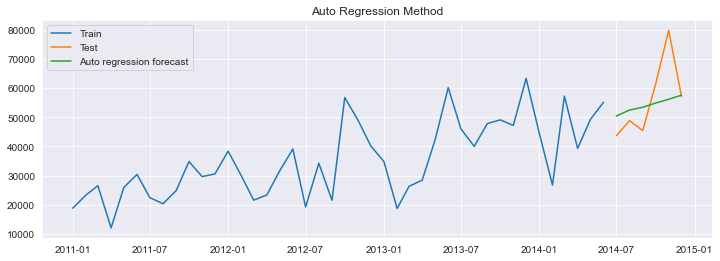

In [84]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [85]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,15192.01,16.10
0,Simple exponential smoothing forecast,14764.31,15.83
0,Holt's exponential smoothing method,11919.62,14.67
0,Holt Winters' additive method,9012.78,9.39
0,Holt Winters' multiplicative method,9975.05,10.20
0,Autoregressive (AR) method,10985.28,13.56


**Inference : AR method works better than Holt Winters' multiplicative method but works poorer than Holt Winters' additive method.**

### Moving average method (MA)

In [86]:
model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) 
model_fit = model.fit()
print(model_fit.params)

const      0.021415
ma.L1.y   -1.000000
dtype: float64


In [87]:
# Recover original time series

y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

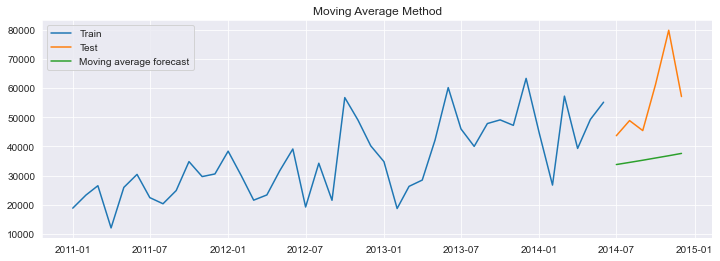

In [88]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(data1['Sales'][:train_len], label='Train')
plt.plot(data1['Sales'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method')
plt.show()

In [89]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,15192.01,16.10
0,Simple exponential smoothing forecast,14764.31,15.83
0,Holt's exponential smoothing method,11919.62,14.67
0,Holt Winters' additive method,9012.78,9.39
0,Holt Winters' multiplicative method,9975.05,10.20
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93


**Inference : MA method clearly performs poorer as compared to AR method.**

### Auto regression moving average method (ARMA)

In [90]:
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.02147
ar.L1.y    0.07458
ma.L1.y   -1.00000
dtype: float64


In [91]:
# Recover original time series

y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

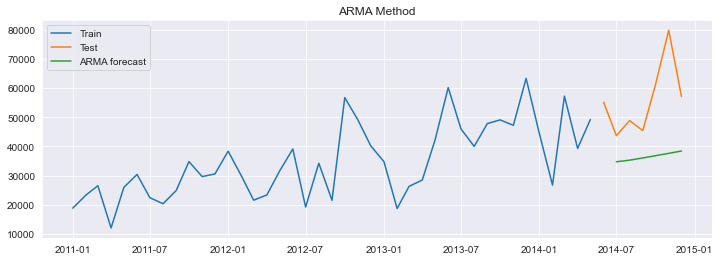

In [92]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot( data1['Sales'][:train_len-1], label='Train')
plt.plot(data1['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

In [93]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,15192.01,16.10
0,Simple exponential smoothing forecast,14764.31,15.83
0,Holt's exponential smoothing method,11919.62,14.67
0,Holt Winters' additive method,9012.78,9.39
0,Holt Winters' multiplicative method,9975.05,10.20
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.31,32.40


**Inference : ARMA method performs better than MA method but poorer as compared to AR method.**

### Auto regressive integrated moving average (ARIMA)

In [94]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

const        0.02147
ar.L1.D.y    0.07458
ma.L1.D.y   -1.00000
dtype: float64


In [95]:
# Recover original time series forecast

y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

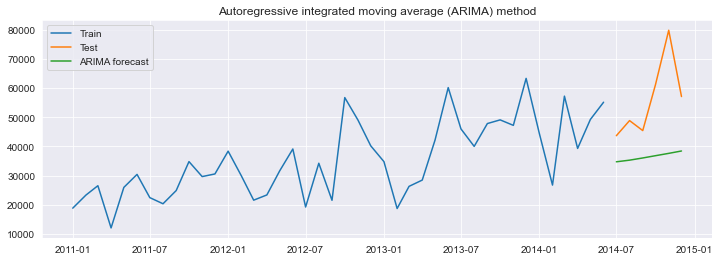

In [96]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

In [97]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,15192.01,16.10
0,Simple exponential smoothing forecast,14764.31,15.83
0,Holt's exponential smoothing method,11919.62,14.67
0,Holt Winters' additive method,9012.78,9.39
0,Holt Winters' multiplicative method,9975.05,10.20
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.31,32.40


### Seasonal auto regressive integrated moving average (SARIMA)

In [98]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.041157
ma.L1      -0.997243
ar.S.L12    0.104227
ma.S.L12   -0.973377
sigma2      0.058197
dtype: float64


In [99]:
# Recover original time series forecast

y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

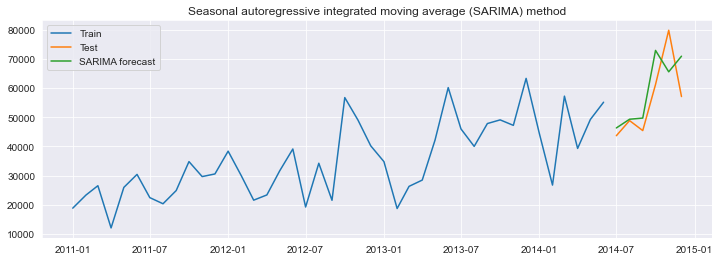

In [100]:
# Plot train, test and forecast

plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

In [101]:
# Calculate RMSE and MAPE

rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,15192.01,16.10
0,Simple exponential smoothing forecast,14764.31,15.83
0,Holt's exponential smoothing method,11919.62,14.67
0,Holt Winters' additive method,9012.78,9.39
0,Holt Winters' multiplicative method,9975.05,10.20
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.31,32.40


**Inference : SARIMA method performs the best among ARIMA set of models.**

### Conclusion : Our inference from the flow chart and the actual models built for forecasting the sales of the time series data, show that: <br><br>  1. Holt Winters' additive method. <br><br> 2. Seasonal auto regressive integrated moving average (SARIMA) technique.<br><br> are the best for forecasting the sales for the data.<br><br> Both the methods have lower RMSE and MAPE values and are able to capture the trend and seasonality components well in the data.

In [102]:
final_result = pd.DataFrame({'Method' : ["Holt Winters' additive method", 'SARIMA'], 'RMSE' : [9012.78, 9636.49], 'MAPE' : [9.39,12.95]})

In [103]:
final_result

,Method,RMSE,MAPE
0,Holt Winters' additive method,9012.78,9.39
1,SARIMA,9636.49,12.95


## Our Analysis is Complete. Thank You.